# Program Description: Machine Learning Modeling (CNN-Classification, Module 10)

## Overview:
This module is responsible for building a **classification** model using a Convolutional Neural Network (CNN). It works in parallel with other network models. The goal is to train the CNN model, save the best-performing model, and make predictions.

- **Input Dataset**: This module reads the dataset output by **Module 9** (normalized data).
- **Model Type**: The model used in this module is a **CNN (Convolutional Neural Network)**, which is trained for classification tasks.
- **Prediction**: After training, the model is used to make predictions on the test set.

## Key Steps:
1. **Read Data**: 
   - The features and labels for training, validation, and test datasets are read from the files output by **Module 9**.
   
2. **Build CNN Model**: 
   - A CNN model is constructed for classification.
   
3. **Train and Save the Best Model**: 
   - The model is trained on the training dataset, and the best model is saved after training.
   
4. **Model Prediction**: 
   - The trained model is used to make predictions on the test set.

5. **Output**:
   - The trained model and evaluation metrics are saved in the `datasets-ml` folder.
   - The model filename includes the timestamp to differentiate between runs (e.g., `CNNmodel-{current_time}.h5`).

## Output:
- **Model File**: The trained CNN model is saved in the `datasets-ml` folder with the filename `CNNmodel-{current_time}.h5`, where `{current_time}` represents the timestamp of the model save.
- **Log Files**: The log file will contain training progress, evaluation metrics, and other relevant details.


contacts：zhaohf@ihep.ac.cn

 # Import libraries

In [1]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import os
import logging
import numpy as np
import joblib
import tensorflow as tf
import keras.callbacks
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

2025-01-06 17:49:20.935133: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


##  Version Information

In [2]:
def get_python_version():
    return sys.version
def get_package_version(package_name):
    try:
        module = __import__(package_name)
        version = getattr(module, '__version__', None)
        if version:
            return version
        else:
            return pkg_resources.get_distribution(package_name).version
    except (ImportError, AttributeError, pkg_resources.DistributionNotFound):
        return "Version info not found"

packages = ['tensorflow', 'numpy', 'joblib', 'matplotlib','seaborn','sklearn']
for package in packages:
    print(f"{package}: {get_package_version(package)}")
print(f"Python: {get_python_version()}")

tensorflow: 2.9.1
numpy: 1.23.5
joblib: 1.4.0
matplotlib: 3.7.5
seaborn: 0.13.2
sklearn: 1.3.2
Python: 3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]


# Parameter Settings (Input File, Output File)

## Input File Path:
- `dir_data`: Specifies the directory where the dataset (features and labels for training, validation, and test) is located.
- The dataset includes **training**, **validation**, and **test** datasets generated by **Module 9**.
- Example: `'0926-datasets/datasets(JmolNN)-pre-xmu-cn'` (path to the dataset).

## Output File Path:
- `dir_output`: The directory where the trained model and other output files will be saved.
- The output includes the model file (`CNNmodel-{current_time}.h5`) and logs.
- Example: `'0926-datasets-ml/ml-cn-xmu-(JmolNN)'` (path where the model and log files will be saved).

In [3]:
# Set input file path
dir_data = '0926-datasets/datasets(JmolNN)-pre-xmu-cn'
# Set output file save path
output_path = '0926-datasets-ml/ml-cn-xmu-(JmolNN)'
current_time = datetime.now().strftime("%Y%m%d_%H%M")
# Output save file name and add timestamp
dir_output=os.path.join(output_path,f'CNNmodel-{current_time}')
# Check if the input path exists
if os.path.exists(dir_data):
    print(f"File '{dir_data}' exists.")
else:
    raise FileNotFoundError(f"File '{dir_data}' does not exist.")
os.makedirs(dir_output, exist_ok=True)
os.makedirs(dir_output, exist_ok=True)
# Load training, validation, and test datasets
file_train_feature = os.path.join(dir_data, 'xmu_train_JmolNN.txt')
file_train_label = os.path.join(dir_data, 'label_cn_train_JmolNN.txt')
file_valid_feature = os.path.join(dir_data, 'xmu_valid_JmolNN.txt')
file_valid_label = os.path.join(dir_data, 'label_cn_valid_JmolNN.txt')
file_test_feature = os.path.join(dir_data, 'xmu_test_JmolNN.txt')
file_test_label = os.path.join(dir_data, 'label_cn_test_JmolNN.txt')
log_file_path = os.path.join(dir_output, 'training_log.txt')
logging.basicConfig(level=logging.INFO, format='%(message)s', handlers=[logging.FileHandler(log_file_path), logging.StreamHandler()])
# Read data
X_train = np.loadtxt(file_train_feature)
y_train = np.loadtxt(file_train_label, dtype=float)
X_valid = np.loadtxt(file_valid_feature)
y_valid = np.loadtxt(file_valid_label, dtype=float)
X_test = np.loadtxt(file_test_feature)
y_test = np.loadtxt(file_test_label, dtype=float)
# Prepare messages for dataset sizes
train_size_message = f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}"
valid_size_message = f"Validation set size: X_valid: {X_valid.shape}, y_valid: {y_valid.shape}"
test_size_message = f"Test set size: X_test: {X_test.shape}, y_test: {y_test.shape}"
print(train_size_message)
print(valid_size_message)
print(test_size_message)
# Log dataset sizes
logging.info(train_size_message)
logging.info(valid_size_message)
logging.info(test_size_message)
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_valid:", np.unique(y_valid))
print("Unique labels in y_test:", np.unique(y_test))


File '0926-datasets/datasets(JmolNN)-pre-xmu-cn' exists.


Training set size: X_train: (3455, 1000), y_train: (3455,)
Validation set size: X_valid: (987, 1000), y_valid: (987,)
Test set size: X_test: (495, 1000), y_test: (495,)


Training set size: X_train: (3455, 1000), y_train: (3455,)
Validation set size: X_valid: (987, 1000), y_valid: (987,)
Test set size: X_test: (495, 1000), y_test: (495,)
Unique labels in y_train: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_valid: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_test: [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


# Build a MLP classification model and save the best model results

In [4]:
# Check the unique values and range of the labels
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_valid:", np.unique(y_valid))
print("Unique labels in y_test:", np.unique(y_test))
logging.info(f"Unique labels in y_train: {np.unique(y_train)}")
logging.info(f"Unique labels in y_valid: {np.unique(y_valid)}")
logging.info(f"Unique labels in y_test: {np.unique(y_test)}")
# Determine the number of classes and the minimum label value
all_labels = np.concatenate((y_train, y_valid, y_test))
num_classes = len(np.unique(all_labels))
min_label = np.min(all_labels)
# Convert labels to one-hot encoding
y_train = to_categorical(y_train - min_label, num_classes=num_classes)
y_valid = to_categorical(y_valid - min_label, num_classes=num_classes)
y_test = to_categorical(y_test - min_label, num_classes=num_classes)
# Build the deep learning model
#model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    #tf.keras.layers.Dense(50, activation='relu'),
    #tf.keras.layers.Dense(num_classes, activation='softmax')  # 输出层，分类问题使用softmax激活函数
#])
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Add Dropout layer
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),# 添加L2正则化
    #tf.keras.layers.Dropout(0.2),  # Add Dropout layer
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # 添加L2正则化
    #tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # 添加L2正则化
    #tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # 添加L2正则化
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
# Customize callback class for logging
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        log_message = (f"Epoch {epoch + 1}, "
                       f"Loss: {logs['loss']:.4f}, "
                       f"Accuracy: {logs['accuracy']:.4f}, "
                       f"Val_Loss: {logs['val_loss']:.4f}, "
                       f"Val_Accuracy: {logs['val_accuracy']:.4f}")
        logging.info(log_message)
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Classification problem uses cross entropy loss function
              metrics=['accuracy','mae']) # Accuracy as an evaluation metric
# Save the best model
model_file = os.path.join(dir_output, 'best_model.h5')
model.save(model_file)
print(f"Best model saved to: {model_file}")
checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Train the model
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint, CustomCallback()],
                    verbose=1)

# Evaluate model performance
loss, accuracy,mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Unique labels in y_train: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_valid: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_test: [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


Unique labels in y_train: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_valid: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_test: [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Best model saved to: 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5
Epoch 1/150


2025-01-06 17:49:23.982884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


107/108 [============================>.] - ETA: 0s - loss: 1.9888 - accuracy: 0.4051 - mae: 0.1216
Epoch 1: val_accuracy improved from -inf to 0.42655, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 1, Loss: 1.9874, Accuracy: 0.4055, Val_Loss: 1.8233, Val_Accuracy: 0.4265


108/108 [==============================] - 1s 8ms/step - loss: 1.9874 - accuracy: 0.4055 - mae: 0.1216 - val_loss: 1.8233 - val_accuracy: 0.4265 - val_mae: 0.1218
Epoch 2/150
100/108 [==========================>...] - ETA: 0s - loss: 1.7623 - accuracy: 0.4403 - mae: 0.1176
Epoch 2: val_accuracy did not improve from 0.42655


Epoch 2, Loss: 1.7529, Accuracy: 0.4425, Val_Loss: 1.7052, Val_Accuracy: 0.4184


108/108 [==============================] - 1s 6ms/step - loss: 1.7529 - accuracy: 0.4425 - mae: 0.1176 - val_loss: 1.7052 - val_accuracy: 0.4184 - val_mae: 0.1161
Epoch 3/150
101/108 [===========================>..] - ETA: 0s - loss: 1.6350 - accuracy: 0.4598 - mae: 0.1152
Epoch 3: val_accuracy improved from 0.42655 to 0.44681, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 3, Loss: 1.6363, Accuracy: 0.4573, Val_Loss: 1.6102, Val_Accuracy: 0.4468


108/108 [==============================] - 1s 7ms/step - loss: 1.6363 - accuracy: 0.4573 - mae: 0.1155 - val_loss: 1.6102 - val_accuracy: 0.4468 - val_mae: 0.1187
Epoch 4/150
102/108 [===========================>..] - ETA: 0s - loss: 1.5569 - accuracy: 0.4614 - mae: 0.1146
Epoch 4: val_accuracy improved from 0.44681 to 0.47315, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 4, Loss: 1.5550, Accuracy: 0.4622, Val_Loss: 1.5557, Val_Accuracy: 0.4732


108/108 [==============================] - 1s 8ms/step - loss: 1.5550 - accuracy: 0.4622 - mae: 0.1147 - val_loss: 1.5557 - val_accuracy: 0.4732 - val_mae: 0.1178
Epoch 5/150
103/108 [===========================>..] - ETA: 0s - loss: 1.4733 - accuracy: 0.4718 - mae: 0.1128
Epoch 5: val_accuracy did not improve from 0.47315


Epoch 5, Loss: 1.4755, Accuracy: 0.4706, Val_Loss: 1.6000, Val_Accuracy: 0.3769


108/108 [==============================] - 1s 6ms/step - loss: 1.4755 - accuracy: 0.4706 - mae: 0.1129 - val_loss: 1.6000 - val_accuracy: 0.3769 - val_mae: 0.1240
Epoch 6/150
101/108 [===========================>..] - ETA: 0s - loss: 1.4492 - accuracy: 0.4588 - mae: 0.1141
Epoch 6: val_accuracy improved from 0.47315 to 0.49949, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 6, Loss: 1.4425, Accuracy: 0.4628, Val_Loss: 1.3841, Val_Accuracy: 0.4995


108/108 [==============================] - 1s 7ms/step - loss: 1.4425 - accuracy: 0.4628 - mae: 0.1138 - val_loss: 1.3841 - val_accuracy: 0.4995 - val_mae: 0.1117
Epoch 7/150
100/108 [==========================>...] - ETA: 0s - loss: 1.3880 - accuracy: 0.4841 - mae: 0.1117
Epoch 7: val_accuracy did not improve from 0.49949


Epoch 7, Loss: 1.3837, Accuracy: 0.4839, Val_Loss: 1.4116, Val_Accuracy: 0.4813


108/108 [==============================] - 1s 6ms/step - loss: 1.3837 - accuracy: 0.4839 - mae: 0.1114 - val_loss: 1.4116 - val_accuracy: 0.4813 - val_mae: 0.1124
Epoch 8/150
 99/108 [==========================>...] - ETA: 0s - loss: 1.3306 - accuracy: 0.4953 - mae: 0.1093
Epoch 8: val_accuracy improved from 0.49949 to 0.50051, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 8, Loss: 1.3250, Accuracy: 0.4958, Val_Loss: 1.2739, Val_Accuracy: 0.5005


108/108 [==============================] - 1s 7ms/step - loss: 1.3250 - accuracy: 0.4958 - mae: 0.1085 - val_loss: 1.2739 - val_accuracy: 0.5005 - val_mae: 0.1065
Epoch 9/150
101/108 [===========================>..] - ETA: 0s - loss: 1.2622 - accuracy: 0.5217 - mae: 0.1051
Epoch 9: val_accuracy improved from 0.50051 to 0.51368, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 9, Loss: 1.2601, Accuracy: 0.5236, Val_Loss: 1.2269, Val_Accuracy: 0.5137


108/108 [==============================] - 1s 7ms/step - loss: 1.2601 - accuracy: 0.5236 - mae: 0.1051 - val_loss: 1.2269 - val_accuracy: 0.5137 - val_mae: 0.1044
Epoch 10/150
108/108 [==============================] - ETA: 0s - loss: 1.2152 - accuracy: 0.5256 - mae: 0.1034
Epoch 10: val_accuracy improved from 0.51368 to 0.57751, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 10, Loss: 1.2152, Accuracy: 0.5256, Val_Loss: 1.1639, Val_Accuracy: 0.5775


108/108 [==============================] - 1s 7ms/step - loss: 1.2152 - accuracy: 0.5256 - mae: 0.1034 - val_loss: 1.1639 - val_accuracy: 0.5775 - val_mae: 0.1018
Epoch 11/150
102/108 [===========================>..] - ETA: 0s - loss: 1.1785 - accuracy: 0.5512 - mae: 0.0998
Epoch 11: val_accuracy did not improve from 0.57751


Epoch 11, Loss: 1.1799, Accuracy: 0.5520, Val_Loss: 1.1974, Val_Accuracy: 0.5451


108/108 [==============================] - 1s 6ms/step - loss: 1.1799 - accuracy: 0.5520 - mae: 0.0998 - val_loss: 1.1974 - val_accuracy: 0.5451 - val_mae: 0.1063
Epoch 12/150
101/108 [===========================>..] - ETA: 0s - loss: 1.1448 - accuracy: 0.5603 - mae: 0.0987
Epoch 12: val_accuracy did not improve from 0.57751


Epoch 12, Loss: 1.1464, Accuracy: 0.5572, Val_Loss: 1.0911, Val_Accuracy: 0.5735


108/108 [==============================] - 1s 6ms/step - loss: 1.1464 - accuracy: 0.5572 - mae: 0.0989 - val_loss: 1.0911 - val_accuracy: 0.5735 - val_mae: 0.0925
Epoch 13/150
101/108 [===========================>..] - ETA: 0s - loss: 1.0947 - accuracy: 0.5653 - mae: 0.0959
Epoch 13: val_accuracy did not improve from 0.57751


Epoch 13, Loss: 1.0928, Accuracy: 0.5679, Val_Loss: 1.0732, Val_Accuracy: 0.5755


108/108 [==============================] - 1s 6ms/step - loss: 1.0928 - accuracy: 0.5679 - mae: 0.0956 - val_loss: 1.0732 - val_accuracy: 0.5755 - val_mae: 0.0907
Epoch 14/150
101/108 [===========================>..] - ETA: 0s - loss: 1.1430 - accuracy: 0.5594 - mae: 0.0992
Epoch 14: val_accuracy improved from 0.57751 to 0.60588, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 14, Loss: 1.1370, Accuracy: 0.5612, Val_Loss: 1.0333, Val_Accuracy: 0.6059


108/108 [==============================] - 1s 7ms/step - loss: 1.1370 - accuracy: 0.5612 - mae: 0.0987 - val_loss: 1.0333 - val_accuracy: 0.6059 - val_mae: 0.0905
Epoch 15/150
100/108 [==========================>...] - ETA: 0s - loss: 1.0521 - accuracy: 0.5784 - mae: 0.0935
Epoch 15: val_accuracy improved from 0.60588 to 0.60993, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 15, Loss: 1.0626, Accuracy: 0.5708, Val_Loss: 1.0486, Val_Accuracy: 0.6099


108/108 [==============================] - 1s 7ms/step - loss: 1.0626 - accuracy: 0.5708 - mae: 0.0942 - val_loss: 1.0486 - val_accuracy: 0.6099 - val_mae: 0.0959
Epoch 16/150
102/108 [===========================>..] - ETA: 0s - loss: 1.0373 - accuracy: 0.5815 - mae: 0.0932
Epoch 16: val_accuracy did not improve from 0.60993


Epoch 16, Loss: 1.0342, Accuracy: 0.5852, Val_Loss: 0.9831, Val_Accuracy: 0.6069


108/108 [==============================] - 1s 6ms/step - loss: 1.0342 - accuracy: 0.5852 - mae: 0.0927 - val_loss: 0.9831 - val_accuracy: 0.6069 - val_mae: 0.0885
Epoch 17/150
101/108 [===========================>..] - ETA: 0s - loss: 1.0109 - accuracy: 0.6101 - mae: 0.0903
Epoch 17: val_accuracy did not improve from 0.60993


Epoch 17, Loss: 1.0196, Accuracy: 0.6046, Val_Loss: 1.0224, Val_Accuracy: 0.5947


108/108 [==============================] - 1s 6ms/step - loss: 1.0196 - accuracy: 0.6046 - mae: 0.0907 - val_loss: 1.0224 - val_accuracy: 0.5947 - val_mae: 0.0916
Epoch 18/150
101/108 [===========================>..] - ETA: 0s - loss: 1.0368 - accuracy: 0.5848 - mae: 0.0944
Epoch 18: val_accuracy improved from 0.60993 to 0.61905, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 18, Loss: 1.0335, Accuracy: 0.5849, Val_Loss: 0.9989, Val_Accuracy: 0.6190


108/108 [==============================] - 1s 7ms/step - loss: 1.0335 - accuracy: 0.5849 - mae: 0.0943 - val_loss: 0.9989 - val_accuracy: 0.6190 - val_mae: 0.0911
Epoch 19/150
102/108 [===========================>..] - ETA: 0s - loss: 0.9898 - accuracy: 0.6180 - mae: 0.0897
Epoch 19: val_accuracy did not improve from 0.61905


Epoch 19, Loss: 0.9871, Accuracy: 0.6179, Val_Loss: 1.2227, Val_Accuracy: 0.5056


108/108 [==============================] - 1s 6ms/step - loss: 0.9871 - accuracy: 0.6179 - mae: 0.0893 - val_loss: 1.2227 - val_accuracy: 0.5056 - val_mae: 0.0960
Epoch 20/150
100/108 [==========================>...] - ETA: 0s - loss: 1.0201 - accuracy: 0.5875 - mae: 0.0931
Epoch 20: val_accuracy improved from 0.61905 to 0.64438, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 20, Loss: 1.0083, Accuracy: 0.5925, Val_Loss: 0.9165, Val_Accuracy: 0.6444


108/108 [==============================] - 1s 7ms/step - loss: 1.0083 - accuracy: 0.5925 - mae: 0.0924 - val_loss: 0.9165 - val_accuracy: 0.6444 - val_mae: 0.0853
Epoch 21/150
101/108 [===========================>..] - ETA: 0s - loss: 0.9693 - accuracy: 0.6098 - mae: 0.0889
Epoch 21: val_accuracy improved from 0.64438 to 0.64742, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 21, Loss: 0.9659, Accuracy: 0.6110, Val_Loss: 0.9321, Val_Accuracy: 0.6474


108/108 [==============================] - 1s 7ms/step - loss: 0.9659 - accuracy: 0.6110 - mae: 0.0885 - val_loss: 0.9321 - val_accuracy: 0.6474 - val_mae: 0.0847
Epoch 22/150
102/108 [===========================>..] - ETA: 0s - loss: 0.9532 - accuracy: 0.6085 - mae: 0.0877
Epoch 22: val_accuracy did not improve from 0.64742


Epoch 22, Loss: 0.9532, Accuracy: 0.6081, Val_Loss: 0.9700, Val_Accuracy: 0.6302


108/108 [==============================] - 1s 6ms/step - loss: 0.9532 - accuracy: 0.6081 - mae: 0.0878 - val_loss: 0.9700 - val_accuracy: 0.6302 - val_mae: 0.0854
Epoch 23/150
101/108 [===========================>..] - ETA: 0s - loss: 0.9528 - accuracy: 0.6176 - mae: 0.0873
Epoch 23: val_accuracy did not improve from 0.64742


Epoch 23, Loss: 0.9564, Accuracy: 0.6145, Val_Loss: 0.9383, Val_Accuracy: 0.6302


108/108 [==============================] - 1s 6ms/step - loss: 0.9564 - accuracy: 0.6145 - mae: 0.0874 - val_loss: 0.9383 - val_accuracy: 0.6302 - val_mae: 0.0873
Epoch 24/150
100/108 [==========================>...] - ETA: 0s - loss: 0.9324 - accuracy: 0.6178 - mae: 0.0867
Epoch 24: val_accuracy improved from 0.64742 to 0.65552, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 24, Loss: 0.9301, Accuracy: 0.6197, Val_Loss: 0.8965, Val_Accuracy: 0.6555


108/108 [==============================] - 1s 7ms/step - loss: 0.9301 - accuracy: 0.6197 - mae: 0.0865 - val_loss: 0.8965 - val_accuracy: 0.6555 - val_mae: 0.0830
Epoch 25/150
101/108 [===========================>..] - ETA: 0s - loss: 0.9134 - accuracy: 0.6272 - mae: 0.0850
Epoch 25: val_accuracy did not improve from 0.65552


Epoch 25, Loss: 0.9167, Accuracy: 0.6246, Val_Loss: 0.8639, Val_Accuracy: 0.6545


108/108 [==============================] - 1s 6ms/step - loss: 0.9167 - accuracy: 0.6246 - mae: 0.0851 - val_loss: 0.8639 - val_accuracy: 0.6545 - val_mae: 0.0815
Epoch 26/150
100/108 [==========================>...] - ETA: 0s - loss: 0.9287 - accuracy: 0.6237 - mae: 0.0862
Epoch 26: val_accuracy did not improve from 0.65552


Epoch 26, Loss: 0.9225, Accuracy: 0.6260, Val_Loss: 0.9023, Val_Accuracy: 0.6373


108/108 [==============================] - 1s 6ms/step - loss: 0.9225 - accuracy: 0.6260 - mae: 0.0858 - val_loss: 0.9023 - val_accuracy: 0.6373 - val_mae: 0.0831
Epoch 27/150
100/108 [==========================>...] - ETA: 0s - loss: 0.9317 - accuracy: 0.6097 - mae: 0.0872
Epoch 27: val_accuracy did not improve from 0.65552


Epoch 27, Loss: 0.9244, Accuracy: 0.6145, Val_Loss: 0.9071, Val_Accuracy: 0.6272


108/108 [==============================] - 1s 6ms/step - loss: 0.9244 - accuracy: 0.6145 - mae: 0.0868 - val_loss: 0.9071 - val_accuracy: 0.6272 - val_mae: 0.0863
Epoch 28/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8789 - accuracy: 0.6417 - mae: 0.0823
Epoch 28: val_accuracy did not improve from 0.65552


Epoch 28, Loss: 0.8870, Accuracy: 0.6399, Val_Loss: 0.9282, Val_Accuracy: 0.6201


108/108 [==============================] - 1s 6ms/step - loss: 0.8870 - accuracy: 0.6399 - mae: 0.0823 - val_loss: 0.9282 - val_accuracy: 0.6201 - val_mae: 0.0851
Epoch 29/150
101/108 [===========================>..] - ETA: 0s - loss: 0.9011 - accuracy: 0.6321 - mae: 0.0836
Epoch 29: val_accuracy did not improve from 0.65552


Epoch 29, Loss: 0.9058, Accuracy: 0.6292, Val_Loss: 0.9805, Val_Accuracy: 0.5907


108/108 [==============================] - 1s 6ms/step - loss: 0.9058 - accuracy: 0.6292 - mae: 0.0840 - val_loss: 0.9805 - val_accuracy: 0.5907 - val_mae: 0.0931
Epoch 30/150
100/108 [==========================>...] - ETA: 0s - loss: 0.8824 - accuracy: 0.6316 - mae: 0.0836
Epoch 30: val_accuracy did not improve from 0.65552


Epoch 30, Loss: 0.8820, Accuracy: 0.6315, Val_Loss: 0.8822, Val_Accuracy: 0.6545


108/108 [==============================] - 1s 6ms/step - loss: 0.8820 - accuracy: 0.6315 - mae: 0.0837 - val_loss: 0.8822 - val_accuracy: 0.6545 - val_mae: 0.0831
Epoch 31/150
101/108 [===========================>..] - ETA: 0s - loss: 0.9050 - accuracy: 0.6176 - mae: 0.0853
Epoch 31: val_accuracy improved from 0.65552 to 0.66565, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 31, Loss: 0.9024, Accuracy: 0.6177, Val_Loss: 0.8915, Val_Accuracy: 0.6657


108/108 [==============================] - 1s 7ms/step - loss: 0.9024 - accuracy: 0.6177 - mae: 0.0854 - val_loss: 0.8915 - val_accuracy: 0.6657 - val_mae: 0.0866
Epoch 32/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8629 - accuracy: 0.6479 - mae: 0.0814
Epoch 32: val_accuracy did not improve from 0.66565


Epoch 32, Loss: 0.8598, Accuracy: 0.6498, Val_Loss: 0.9260, Val_Accuracy: 0.5947


108/108 [==============================] - 1s 6ms/step - loss: 0.8598 - accuracy: 0.6498 - mae: 0.0813 - val_loss: 0.9260 - val_accuracy: 0.5947 - val_mae: 0.0852
Epoch 33/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8921 - accuracy: 0.6405 - mae: 0.0842
Epoch 33: val_accuracy improved from 0.66565 to 0.67072, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 33, Loss: 0.8920, Accuracy: 0.6420, Val_Loss: 0.8759, Val_Accuracy: 0.6707


108/108 [==============================] - 1s 7ms/step - loss: 0.8920 - accuracy: 0.6420 - mae: 0.0839 - val_loss: 0.8759 - val_accuracy: 0.6707 - val_mae: 0.0806
Epoch 34/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8647 - accuracy: 0.6417 - mae: 0.0822
Epoch 34: val_accuracy did not improve from 0.67072


Epoch 34, Loss: 0.8639, Accuracy: 0.6405, Val_Loss: 0.8634, Val_Accuracy: 0.6545


108/108 [==============================] - 1s 6ms/step - loss: 0.8639 - accuracy: 0.6405 - mae: 0.0821 - val_loss: 0.8634 - val_accuracy: 0.6545 - val_mae: 0.0842
Epoch 35/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8724 - accuracy: 0.6386 - mae: 0.0829
Epoch 35: val_accuracy did not improve from 0.67072


Epoch 35, Loss: 0.8759, Accuracy: 0.6359, Val_Loss: 0.9110, Val_Accuracy: 0.6292


108/108 [==============================] - 1s 6ms/step - loss: 0.8759 - accuracy: 0.6359 - mae: 0.0830 - val_loss: 0.9110 - val_accuracy: 0.6292 - val_mae: 0.0843
Epoch 36/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8613 - accuracy: 0.6454 - mae: 0.0823
Epoch 36: val_accuracy did not improve from 0.67072


Epoch 36, Loss: 0.8683, Accuracy: 0.6402, Val_Loss: 1.0141, Val_Accuracy: 0.5704


108/108 [==============================] - 1s 6ms/step - loss: 0.8683 - accuracy: 0.6402 - mae: 0.0827 - val_loss: 1.0141 - val_accuracy: 0.5704 - val_mae: 0.0926
Epoch 37/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8672 - accuracy: 0.6402 - mae: 0.0828
Epoch 37: val_accuracy did not improve from 0.67072


Epoch 37, Loss: 0.8644, Accuracy: 0.6420, Val_Loss: 0.8918, Val_Accuracy: 0.6342


108/108 [==============================] - 1s 6ms/step - loss: 0.8644 - accuracy: 0.6420 - mae: 0.0826 - val_loss: 0.8918 - val_accuracy: 0.6342 - val_mae: 0.0826
Epoch 38/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8706 - accuracy: 0.6330 - mae: 0.0837
Epoch 38: val_accuracy did not improve from 0.67072


Epoch 38, Loss: 0.8691, Accuracy: 0.6347, Val_Loss: 0.8823, Val_Accuracy: 0.6434


108/108 [==============================] - 1s 6ms/step - loss: 0.8691 - accuracy: 0.6347 - mae: 0.0833 - val_loss: 0.8823 - val_accuracy: 0.6434 - val_mae: 0.0831
Epoch 39/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8582 - accuracy: 0.6368 - mae: 0.0822
Epoch 39: val_accuracy did not improve from 0.67072


Epoch 39, Loss: 0.8582, Accuracy: 0.6365, Val_Loss: 0.8409, Val_Accuracy: 0.6636


108/108 [==============================] - 1s 6ms/step - loss: 0.8582 - accuracy: 0.6365 - mae: 0.0824 - val_loss: 0.8409 - val_accuracy: 0.6636 - val_mae: 0.0799
Epoch 40/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8174 - accuracy: 0.6668 - mae: 0.0789
Epoch 40: val_accuracy did not improve from 0.67072


Epoch 40, Loss: 0.8128, Accuracy: 0.6683, Val_Loss: 0.8541, Val_Accuracy: 0.6494


108/108 [==============================] - 1s 6ms/step - loss: 0.8128 - accuracy: 0.6683 - mae: 0.0786 - val_loss: 0.8541 - val_accuracy: 0.6494 - val_mae: 0.0788
Epoch 41/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8645 - accuracy: 0.6389 - mae: 0.0820
Epoch 41: val_accuracy did not improve from 0.67072


Epoch 41, Loss: 0.8599, Accuracy: 0.6420, Val_Loss: 0.8645, Val_Accuracy: 0.6596


108/108 [==============================] - 1s 6ms/step - loss: 0.8599 - accuracy: 0.6420 - mae: 0.0817 - val_loss: 0.8645 - val_accuracy: 0.6596 - val_mae: 0.0820
Epoch 42/150
100/108 [==========================>...] - ETA: 0s - loss: 0.8245 - accuracy: 0.6625 - mae: 0.0791
Epoch 42: val_accuracy did not improve from 0.67072


Epoch 42, Loss: 0.8215, Accuracy: 0.6640, Val_Loss: 0.8537, Val_Accuracy: 0.6525


108/108 [==============================] - 1s 6ms/step - loss: 0.8215 - accuracy: 0.6640 - mae: 0.0789 - val_loss: 0.8537 - val_accuracy: 0.6525 - val_mae: 0.0810
Epoch 43/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8307 - accuracy: 0.6504 - mae: 0.0795
Epoch 43: val_accuracy did not improve from 0.67072


Epoch 43, Loss: 0.8367, Accuracy: 0.6469, Val_Loss: 0.8307, Val_Accuracy: 0.6606


108/108 [==============================] - 1s 6ms/step - loss: 0.8367 - accuracy: 0.6469 - mae: 0.0801 - val_loss: 0.8307 - val_accuracy: 0.6606 - val_mae: 0.0811
Epoch 44/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8186 - accuracy: 0.6615 - mae: 0.0786
Epoch 44: val_accuracy did not improve from 0.67072


Epoch 44, Loss: 0.8249, Accuracy: 0.6556, Val_Loss: 0.8233, Val_Accuracy: 0.6707


108/108 [==============================] - 1s 6ms/step - loss: 0.8249 - accuracy: 0.6556 - mae: 0.0792 - val_loss: 0.8233 - val_accuracy: 0.6707 - val_mae: 0.0803
Epoch 45/150
100/108 [==========================>...] - ETA: 0s - loss: 0.8195 - accuracy: 0.6553 - mae: 0.0791
Epoch 45: val_accuracy did not improve from 0.67072


Epoch 45, Loss: 0.8252, Accuracy: 0.6524, Val_Loss: 0.8626, Val_Accuracy: 0.6545


108/108 [==============================] - 1s 6ms/step - loss: 0.8252 - accuracy: 0.6524 - mae: 0.0796 - val_loss: 0.8626 - val_accuracy: 0.6545 - val_mae: 0.0828
Epoch 46/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8343 - accuracy: 0.6476 - mae: 0.0809
Epoch 46: val_accuracy improved from 0.67072 to 0.67579, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 46, Loss: 0.8410, Accuracy: 0.6483, Val_Loss: 0.8119, Val_Accuracy: 0.6758


108/108 [==============================] - 1s 7ms/step - loss: 0.8410 - accuracy: 0.6483 - mae: 0.0810 - val_loss: 0.8119 - val_accuracy: 0.6758 - val_mae: 0.0768
Epoch 47/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8289 - accuracy: 0.6550 - mae: 0.0806
Epoch 47: val_accuracy did not improve from 0.67579


Epoch 47, Loss: 0.8256, Accuracy: 0.6573, Val_Loss: 0.8620, Val_Accuracy: 0.6464


108/108 [==============================] - 1s 6ms/step - loss: 0.8256 - accuracy: 0.6573 - mae: 0.0803 - val_loss: 0.8620 - val_accuracy: 0.6464 - val_mae: 0.0791
Epoch 48/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8237 - accuracy: 0.6566 - mae: 0.0796
Epoch 48: val_accuracy did not improve from 0.67579


Epoch 48, Loss: 0.8242, Accuracy: 0.6579, Val_Loss: 0.8243, Val_Accuracy: 0.6707


108/108 [==============================] - 1s 6ms/step - loss: 0.8242 - accuracy: 0.6579 - mae: 0.0796 - val_loss: 0.8243 - val_accuracy: 0.6707 - val_mae: 0.0779
Epoch 49/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8070 - accuracy: 0.6705 - mae: 0.0779
Epoch 49: val_accuracy did not improve from 0.67579


Epoch 49, Loss: 0.8035, Accuracy: 0.6724, Val_Loss: 0.8617, Val_Accuracy: 0.6332


108/108 [==============================] - 1s 6ms/step - loss: 0.8035 - accuracy: 0.6724 - mae: 0.0776 - val_loss: 0.8617 - val_accuracy: 0.6332 - val_mae: 0.0824
Epoch 50/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8274 - accuracy: 0.6587 - mae: 0.0800
Epoch 50: val_accuracy did not improve from 0.67579


Epoch 50, Loss: 0.8270, Accuracy: 0.6599, Val_Loss: 1.0957, Val_Accuracy: 0.5481


108/108 [==============================] - 1s 6ms/step - loss: 0.8270 - accuracy: 0.6599 - mae: 0.0800 - val_loss: 1.0957 - val_accuracy: 0.5481 - val_mae: 0.0902
Epoch 51/150
100/108 [==========================>...] - ETA: 0s - loss: 0.8316 - accuracy: 0.6544 - mae: 0.0807
Epoch 51: val_accuracy did not improve from 0.67579


Epoch 51, Loss: 0.8274, Accuracy: 0.6550, Val_Loss: 0.8569, Val_Accuracy: 0.6657


108/108 [==============================] - 1s 6ms/step - loss: 0.8274 - accuracy: 0.6550 - mae: 0.0804 - val_loss: 0.8569 - val_accuracy: 0.6657 - val_mae: 0.0822
Epoch 52/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8098 - accuracy: 0.6587 - mae: 0.0789
Epoch 52: val_accuracy did not improve from 0.67579


Epoch 52, Loss: 0.8131, Accuracy: 0.6570, Val_Loss: 0.9174, Val_Accuracy: 0.6150


108/108 [==============================] - 1s 6ms/step - loss: 0.8131 - accuracy: 0.6570 - mae: 0.0790 - val_loss: 0.9174 - val_accuracy: 0.6150 - val_mae: 0.0821
Epoch 53/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8145 - accuracy: 0.6658 - mae: 0.0779
Epoch 53: val_accuracy did not improve from 0.67579


Epoch 53, Loss: 0.8204, Accuracy: 0.6614, Val_Loss: 0.9074, Val_Accuracy: 0.6261


108/108 [==============================] - 1s 6ms/step - loss: 0.8204 - accuracy: 0.6614 - mae: 0.0784 - val_loss: 0.9074 - val_accuracy: 0.6261 - val_mae: 0.0825
Epoch 54/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8304 - accuracy: 0.6423 - mae: 0.0814
Epoch 54: val_accuracy did not improve from 0.67579


Epoch 54, Loss: 0.8278, Accuracy: 0.6417, Val_Loss: 0.7876, Val_Accuracy: 0.6727


108/108 [==============================] - 1s 6ms/step - loss: 0.8278 - accuracy: 0.6417 - mae: 0.0812 - val_loss: 0.7876 - val_accuracy: 0.6727 - val_mae: 0.0771
Epoch 55/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8009 - accuracy: 0.6677 - mae: 0.0777
Epoch 55: val_accuracy did not improve from 0.67579


Epoch 55, Loss: 0.8007, Accuracy: 0.6686, Val_Loss: 0.8365, Val_Accuracy: 0.6596


108/108 [==============================] - 1s 6ms/step - loss: 0.8007 - accuracy: 0.6686 - mae: 0.0779 - val_loss: 0.8365 - val_accuracy: 0.6596 - val_mae: 0.0802
Epoch 56/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8026 - accuracy: 0.6631 - mae: 0.0778
Epoch 56: val_accuracy did not improve from 0.67579


Epoch 56, Loss: 0.8038, Accuracy: 0.6640, Val_Loss: 0.8598, Val_Accuracy: 0.6484


108/108 [==============================] - 1s 6ms/step - loss: 0.8038 - accuracy: 0.6640 - mae: 0.0779 - val_loss: 0.8598 - val_accuracy: 0.6484 - val_mae: 0.0798
Epoch 57/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8184 - accuracy: 0.6606 - mae: 0.0786
Epoch 57: val_accuracy did not improve from 0.67579


Epoch 57, Loss: 0.8164, Accuracy: 0.6605, Val_Loss: 0.8107, Val_Accuracy: 0.6738


108/108 [==============================] - 1s 6ms/step - loss: 0.8164 - accuracy: 0.6605 - mae: 0.0788 - val_loss: 0.8107 - val_accuracy: 0.6738 - val_mae: 0.0767
Epoch 58/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7948 - accuracy: 0.6612 - mae: 0.0776
Epoch 58: val_accuracy did not improve from 0.67579


Epoch 58, Loss: 0.7950, Accuracy: 0.6619, Val_Loss: 0.8430, Val_Accuracy: 0.6707


108/108 [==============================] - 1s 6ms/step - loss: 0.7950 - accuracy: 0.6619 - mae: 0.0773 - val_loss: 0.8430 - val_accuracy: 0.6707 - val_mae: 0.0776
Epoch 59/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8078 - accuracy: 0.6649 - mae: 0.0780
Epoch 59: val_accuracy did not improve from 0.67579


Epoch 59, Loss: 0.8085, Accuracy: 0.6648, Val_Loss: 0.8991, Val_Accuracy: 0.6474


108/108 [==============================] - 1s 6ms/step - loss: 0.8085 - accuracy: 0.6648 - mae: 0.0783 - val_loss: 0.8991 - val_accuracy: 0.6474 - val_mae: 0.0856
Epoch 60/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7973 - accuracy: 0.6711 - mae: 0.0782
Epoch 60: val_accuracy did not improve from 0.67579


Epoch 60, Loss: 0.8011, Accuracy: 0.6671, Val_Loss: 0.8753, Val_Accuracy: 0.6332


108/108 [==============================] - 1s 6ms/step - loss: 0.8011 - accuracy: 0.6671 - mae: 0.0784 - val_loss: 0.8753 - val_accuracy: 0.6332 - val_mae: 0.0834
Epoch 61/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7944 - accuracy: 0.6640 - mae: 0.0775
Epoch 61: val_accuracy did not improve from 0.67579


Epoch 61, Loss: 0.7943, Accuracy: 0.6654, Val_Loss: 0.8253, Val_Accuracy: 0.6575


108/108 [==============================] - 1s 6ms/step - loss: 0.7943 - accuracy: 0.6654 - mae: 0.0774 - val_loss: 0.8253 - val_accuracy: 0.6575 - val_mae: 0.0777
Epoch 62/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7818 - accuracy: 0.6658 - mae: 0.0765
Epoch 62: val_accuracy did not improve from 0.67579


Epoch 62, Loss: 0.7766, Accuracy: 0.6706, Val_Loss: 0.8058, Val_Accuracy: 0.6565


108/108 [==============================] - 1s 6ms/step - loss: 0.7766 - accuracy: 0.6706 - mae: 0.0762 - val_loss: 0.8058 - val_accuracy: 0.6565 - val_mae: 0.0787
Epoch 63/150
100/108 [==========================>...] - ETA: 0s - loss: 0.7997 - accuracy: 0.6675 - mae: 0.0774
Epoch 63: val_accuracy did not improve from 0.67579


Epoch 63, Loss: 0.7980, Accuracy: 0.6680, Val_Loss: 0.8443, Val_Accuracy: 0.6535


108/108 [==============================] - 1s 6ms/step - loss: 0.7980 - accuracy: 0.6680 - mae: 0.0775 - val_loss: 0.8443 - val_accuracy: 0.6535 - val_mae: 0.0811
Epoch 64/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7982 - accuracy: 0.6705 - mae: 0.0771
Epoch 64: val_accuracy did not improve from 0.67579


Epoch 64, Loss: 0.7961, Accuracy: 0.6686, Val_Loss: 0.9001, Val_Accuracy: 0.6089


108/108 [==============================] - 1s 6ms/step - loss: 0.7961 - accuracy: 0.6686 - mae: 0.0772 - val_loss: 0.9001 - val_accuracy: 0.6089 - val_mae: 0.0862
Epoch 65/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7731 - accuracy: 0.6649 - mae: 0.0764
Epoch 65: val_accuracy did not improve from 0.67579


Epoch 65, Loss: 0.7819, Accuracy: 0.6582, Val_Loss: 0.8494, Val_Accuracy: 0.6464


108/108 [==============================] - 1s 6ms/step - loss: 0.7819 - accuracy: 0.6582 - mae: 0.0770 - val_loss: 0.8494 - val_accuracy: 0.6464 - val_mae: 0.0811
Epoch 66/150
101/108 [===========================>..] - ETA: 0s - loss: 0.8152 - accuracy: 0.6547 - mae: 0.0785
Epoch 66: val_accuracy did not improve from 0.67579


Epoch 66, Loss: 0.8120, Accuracy: 0.6559, Val_Loss: 0.8163, Val_Accuracy: 0.6758


108/108 [==============================] - 1s 6ms/step - loss: 0.8120 - accuracy: 0.6559 - mae: 0.0785 - val_loss: 0.8163 - val_accuracy: 0.6758 - val_mae: 0.0810
Epoch 67/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7619 - accuracy: 0.6829 - mae: 0.0756
Epoch 67: val_accuracy improved from 0.67579 to 0.67882, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 67, Loss: 0.7636, Accuracy: 0.6810, Val_Loss: 0.7848, Val_Accuracy: 0.6788


108/108 [==============================] - 1s 7ms/step - loss: 0.7636 - accuracy: 0.6810 - mae: 0.0755 - val_loss: 0.7848 - val_accuracy: 0.6788 - val_mae: 0.0745
Epoch 68/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7783 - accuracy: 0.6761 - mae: 0.0757
Epoch 68: val_accuracy did not improve from 0.67882


Epoch 68, Loss: 0.7792, Accuracy: 0.6767, Val_Loss: 0.8462, Val_Accuracy: 0.6646


108/108 [==============================] - 1s 6ms/step - loss: 0.7792 - accuracy: 0.6767 - mae: 0.0759 - val_loss: 0.8462 - val_accuracy: 0.6646 - val_mae: 0.0801
Epoch 69/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7741 - accuracy: 0.6674 - mae: 0.0758
Epoch 69: val_accuracy did not improve from 0.67882


Epoch 69, Loss: 0.7722, Accuracy: 0.6726, Val_Loss: 0.8278, Val_Accuracy: 0.6657


108/108 [==============================] - 1s 6ms/step - loss: 0.7722 - accuracy: 0.6726 - mae: 0.0757 - val_loss: 0.8278 - val_accuracy: 0.6657 - val_mae: 0.0790
Epoch 70/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7685 - accuracy: 0.6878 - mae: 0.0747
Epoch 70: val_accuracy improved from 0.67882 to 0.68490, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 70, Loss: 0.7692, Accuracy: 0.6868, Val_Loss: 0.7900, Val_Accuracy: 0.6849


108/108 [==============================] - 1s 7ms/step - loss: 0.7692 - accuracy: 0.6868 - mae: 0.0749 - val_loss: 0.7900 - val_accuracy: 0.6849 - val_mae: 0.0761
Epoch 71/150
100/108 [==========================>...] - ETA: 0s - loss: 0.7748 - accuracy: 0.6806 - mae: 0.0755
Epoch 71: val_accuracy did not improve from 0.68490


Epoch 71, Loss: 0.7805, Accuracy: 0.6767, Val_Loss: 0.8156, Val_Accuracy: 0.6667


108/108 [==============================] - 1s 6ms/step - loss: 0.7805 - accuracy: 0.6767 - mae: 0.0758 - val_loss: 0.8156 - val_accuracy: 0.6667 - val_mae: 0.0799
Epoch 72/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7658 - accuracy: 0.6900 - mae: 0.0754
Epoch 72: val_accuracy did not improve from 0.68490


Epoch 72, Loss: 0.7741, Accuracy: 0.6868, Val_Loss: 0.8282, Val_Accuracy: 0.6636


108/108 [==============================] - 1s 6ms/step - loss: 0.7741 - accuracy: 0.6868 - mae: 0.0757 - val_loss: 0.8282 - val_accuracy: 0.6636 - val_mae: 0.0769
Epoch 73/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7781 - accuracy: 0.6587 - mae: 0.0765
Epoch 73: val_accuracy did not improve from 0.68490


Epoch 73, Loss: 0.7843, Accuracy: 0.6596, Val_Loss: 0.8432, Val_Accuracy: 0.6302


108/108 [==============================] - 1s 6ms/step - loss: 0.7843 - accuracy: 0.6596 - mae: 0.0767 - val_loss: 0.8432 - val_accuracy: 0.6302 - val_mae: 0.0830
Epoch 74/150
100/108 [==========================>...] - ETA: 0s - loss: 0.7730 - accuracy: 0.6778 - mae: 0.0759
Epoch 74: val_accuracy improved from 0.68490 to 0.69200, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 74, Loss: 0.7713, Accuracy: 0.6799, Val_Loss: 0.7975, Val_Accuracy: 0.6920


108/108 [==============================] - 1s 7ms/step - loss: 0.7713 - accuracy: 0.6799 - mae: 0.0758 - val_loss: 0.7975 - val_accuracy: 0.6920 - val_mae: 0.0762
Epoch 75/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7774 - accuracy: 0.6655 - mae: 0.0762
Epoch 75: val_accuracy did not improve from 0.69200


Epoch 75, Loss: 0.7756, Accuracy: 0.6683, Val_Loss: 0.8054, Val_Accuracy: 0.6677


108/108 [==============================] - 1s 6ms/step - loss: 0.7756 - accuracy: 0.6683 - mae: 0.0762 - val_loss: 0.8054 - val_accuracy: 0.6677 - val_mae: 0.0771
Epoch 76/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7682 - accuracy: 0.6708 - mae: 0.0753
Epoch 76: val_accuracy did not improve from 0.69200


Epoch 76, Loss: 0.7689, Accuracy: 0.6680, Val_Loss: 0.8615, Val_Accuracy: 0.6636


108/108 [==============================] - 1s 6ms/step - loss: 0.7689 - accuracy: 0.6680 - mae: 0.0755 - val_loss: 0.8615 - val_accuracy: 0.6636 - val_mae: 0.0793
Epoch 77/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7600 - accuracy: 0.6844 - mae: 0.0745
Epoch 77: val_accuracy did not improve from 0.69200


Epoch 77, Loss: 0.7602, Accuracy: 0.6848, Val_Loss: 0.8275, Val_Accuracy: 0.6717


108/108 [==============================] - 1s 6ms/step - loss: 0.7602 - accuracy: 0.6848 - mae: 0.0745 - val_loss: 0.8275 - val_accuracy: 0.6717 - val_mae: 0.0761
Epoch 78/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7798 - accuracy: 0.6640 - mae: 0.0772
Epoch 78: val_accuracy did not improve from 0.69200


Epoch 78, Loss: 0.7768, Accuracy: 0.6645, Val_Loss: 0.7983, Val_Accuracy: 0.6778


108/108 [==============================] - 1s 6ms/step - loss: 0.7768 - accuracy: 0.6645 - mae: 0.0769 - val_loss: 0.7983 - val_accuracy: 0.6778 - val_mae: 0.0766
Epoch 79/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7747 - accuracy: 0.6702 - mae: 0.0758
Epoch 79: val_accuracy did not improve from 0.69200


Epoch 79, Loss: 0.7755, Accuracy: 0.6686, Val_Loss: 0.7935, Val_Accuracy: 0.6768


108/108 [==============================] - 1s 6ms/step - loss: 0.7755 - accuracy: 0.6686 - mae: 0.0759 - val_loss: 0.7935 - val_accuracy: 0.6768 - val_mae: 0.0759
Epoch 80/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7557 - accuracy: 0.6807 - mae: 0.0747
Epoch 80: val_accuracy did not improve from 0.69200


Epoch 80, Loss: 0.7564, Accuracy: 0.6787, Val_Loss: 0.7951, Val_Accuracy: 0.6819


108/108 [==============================] - 1s 6ms/step - loss: 0.7564 - accuracy: 0.6787 - mae: 0.0745 - val_loss: 0.7951 - val_accuracy: 0.6819 - val_mae: 0.0747
Epoch 81/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7687 - accuracy: 0.6757 - mae: 0.0752
Epoch 81: val_accuracy did not improve from 0.69200


Epoch 81, Loss: 0.7705, Accuracy: 0.6770, Val_Loss: 0.8221, Val_Accuracy: 0.6636


108/108 [==============================] - 1s 6ms/step - loss: 0.7705 - accuracy: 0.6770 - mae: 0.0753 - val_loss: 0.8221 - val_accuracy: 0.6636 - val_mae: 0.0748
Epoch 82/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7672 - accuracy: 0.6754 - mae: 0.0750
Epoch 82: val_accuracy did not improve from 0.69200


Epoch 82, Loss: 0.7663, Accuracy: 0.6741, Val_Loss: 0.7611, Val_Accuracy: 0.6849


108/108 [==============================] - 1s 6ms/step - loss: 0.7663 - accuracy: 0.6741 - mae: 0.0751 - val_loss: 0.7611 - val_accuracy: 0.6849 - val_mae: 0.0739
Epoch 83/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7523 - accuracy: 0.6878 - mae: 0.0739
Epoch 83: val_accuracy did not improve from 0.69200


Epoch 83, Loss: 0.7559, Accuracy: 0.6845, Val_Loss: 0.8184, Val_Accuracy: 0.6606


108/108 [==============================] - 1s 6ms/step - loss: 0.7559 - accuracy: 0.6845 - mae: 0.0740 - val_loss: 0.8184 - val_accuracy: 0.6606 - val_mae: 0.0777
Epoch 84/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7631 - accuracy: 0.6847 - mae: 0.0750
Epoch 84: val_accuracy did not improve from 0.69200


Epoch 84, Loss: 0.7678, Accuracy: 0.6810, Val_Loss: 0.8191, Val_Accuracy: 0.6515


108/108 [==============================] - 1s 6ms/step - loss: 0.7678 - accuracy: 0.6810 - mae: 0.0754 - val_loss: 0.8191 - val_accuracy: 0.6515 - val_mae: 0.0763
Epoch 85/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7672 - accuracy: 0.6764 - mae: 0.0751
Epoch 85: val_accuracy did not improve from 0.69200


Epoch 85, Loss: 0.7676, Accuracy: 0.6738, Val_Loss: 0.7763, Val_Accuracy: 0.6636


108/108 [==============================] - 1s 6ms/step - loss: 0.7676 - accuracy: 0.6738 - mae: 0.0752 - val_loss: 0.7763 - val_accuracy: 0.6636 - val_mae: 0.0760
Epoch 86/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7633 - accuracy: 0.6795 - mae: 0.0752
Epoch 86: val_accuracy did not improve from 0.69200


Epoch 86, Loss: 0.7637, Accuracy: 0.6802, Val_Loss: 0.8638, Val_Accuracy: 0.6312


108/108 [==============================] - 1s 6ms/step - loss: 0.7637 - accuracy: 0.6802 - mae: 0.0750 - val_loss: 0.8638 - val_accuracy: 0.6312 - val_mae: 0.0796
Epoch 87/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7626 - accuracy: 0.6751 - mae: 0.0756
Epoch 87: val_accuracy did not improve from 0.69200


Epoch 87, Loss: 0.7576, Accuracy: 0.6761, Val_Loss: 0.8767, Val_Accuracy: 0.6413


108/108 [==============================] - 1s 6ms/step - loss: 0.7576 - accuracy: 0.6761 - mae: 0.0752 - val_loss: 0.8767 - val_accuracy: 0.6413 - val_mae: 0.0773
Epoch 88/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7606 - accuracy: 0.6714 - mae: 0.0751
Epoch 88: val_accuracy did not improve from 0.69200


Epoch 88, Loss: 0.7616, Accuracy: 0.6744, Val_Loss: 0.8320, Val_Accuracy: 0.6646


108/108 [==============================] - 1s 6ms/step - loss: 0.7616 - accuracy: 0.6744 - mae: 0.0752 - val_loss: 0.8320 - val_accuracy: 0.6646 - val_mae: 0.0784
Epoch 89/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7482 - accuracy: 0.6875 - mae: 0.0733
Epoch 89: val_accuracy did not improve from 0.69200


Epoch 89, Loss: 0.7493, Accuracy: 0.6874, Val_Loss: 0.7681, Val_Accuracy: 0.6839


108/108 [==============================] - 1s 6ms/step - loss: 0.7493 - accuracy: 0.6874 - mae: 0.0733 - val_loss: 0.7681 - val_accuracy: 0.6839 - val_mae: 0.0749
Epoch 90/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7441 - accuracy: 0.6940 - mae: 0.0734
Epoch 90: val_accuracy did not improve from 0.69200


Epoch 90, Loss: 0.7493, Accuracy: 0.6909, Val_Loss: 0.7787, Val_Accuracy: 0.6839


108/108 [==============================] - 1s 6ms/step - loss: 0.7493 - accuracy: 0.6909 - mae: 0.0739 - val_loss: 0.7787 - val_accuracy: 0.6839 - val_mae: 0.0747
Epoch 91/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7511 - accuracy: 0.6841 - mae: 0.0748
Epoch 91: val_accuracy did not improve from 0.69200


Epoch 91, Loss: 0.7519, Accuracy: 0.6851, Val_Loss: 0.8573, Val_Accuracy: 0.6606


108/108 [==============================] - 1s 6ms/step - loss: 0.7519 - accuracy: 0.6851 - mae: 0.0748 - val_loss: 0.8573 - val_accuracy: 0.6606 - val_mae: 0.0767
Epoch 92/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7315 - accuracy: 0.6869 - mae: 0.0726
Epoch 92: val_accuracy did not improve from 0.69200


Epoch 92, Loss: 0.7332, Accuracy: 0.6883, Val_Loss: 0.8629, Val_Accuracy: 0.6515


108/108 [==============================] - 1s 6ms/step - loss: 0.7332 - accuracy: 0.6883 - mae: 0.0727 - val_loss: 0.8629 - val_accuracy: 0.6515 - val_mae: 0.0761
Epoch 93/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7616 - accuracy: 0.6860 - mae: 0.0738
Epoch 93: val_accuracy did not improve from 0.69200


Epoch 93, Loss: 0.7579, Accuracy: 0.6868, Val_Loss: 0.7803, Val_Accuracy: 0.6738


108/108 [==============================] - 1s 6ms/step - loss: 0.7579 - accuracy: 0.6868 - mae: 0.0736 - val_loss: 0.7803 - val_accuracy: 0.6738 - val_mae: 0.0746
Epoch 94/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7467 - accuracy: 0.6853 - mae: 0.0730
Epoch 94: val_accuracy did not improve from 0.69200


Epoch 94, Loss: 0.7540, Accuracy: 0.6836, Val_Loss: 0.7747, Val_Accuracy: 0.6920


108/108 [==============================] - 1s 6ms/step - loss: 0.7540 - accuracy: 0.6836 - mae: 0.0737 - val_loss: 0.7747 - val_accuracy: 0.6920 - val_mae: 0.0740
Epoch 95/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7478 - accuracy: 0.6825 - mae: 0.0736
Epoch 95: val_accuracy did not improve from 0.69200


Epoch 95, Loss: 0.7451, Accuracy: 0.6860, Val_Loss: 0.7712, Val_Accuracy: 0.6920


108/108 [==============================] - 1s 6ms/step - loss: 0.7451 - accuracy: 0.6860 - mae: 0.0736 - val_loss: 0.7712 - val_accuracy: 0.6920 - val_mae: 0.0752
Epoch 96/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7334 - accuracy: 0.6890 - mae: 0.0722
Epoch 96: val_accuracy did not improve from 0.69200


Epoch 96, Loss: 0.7324, Accuracy: 0.6897, Val_Loss: 0.8053, Val_Accuracy: 0.6727


108/108 [==============================] - 1s 6ms/step - loss: 0.7324 - accuracy: 0.6897 - mae: 0.0722 - val_loss: 0.8053 - val_accuracy: 0.6727 - val_mae: 0.0753
Epoch 97/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7459 - accuracy: 0.6850 - mae: 0.0730
Epoch 97: val_accuracy did not improve from 0.69200


Epoch 97, Loss: 0.7420, Accuracy: 0.6909, Val_Loss: 0.8258, Val_Accuracy: 0.6707


108/108 [==============================] - 1s 6ms/step - loss: 0.7420 - accuracy: 0.6909 - mae: 0.0728 - val_loss: 0.8258 - val_accuracy: 0.6707 - val_mae: 0.0762
Epoch 98/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7466 - accuracy: 0.6841 - mae: 0.0734
Epoch 98: val_accuracy did not improve from 0.69200


Epoch 98, Loss: 0.7559, Accuracy: 0.6808, Val_Loss: 0.8357, Val_Accuracy: 0.6596


108/108 [==============================] - 1s 6ms/step - loss: 0.7559 - accuracy: 0.6808 - mae: 0.0742 - val_loss: 0.8357 - val_accuracy: 0.6596 - val_mae: 0.0820
Epoch 99/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7662 - accuracy: 0.6779 - mae: 0.0757
Epoch 99: val_accuracy improved from 0.69200 to 0.69504, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 99, Loss: 0.7668, Accuracy: 0.6796, Val_Loss: 0.7615, Val_Accuracy: 0.6950


108/108 [==============================] - 1s 7ms/step - loss: 0.7668 - accuracy: 0.6796 - mae: 0.0757 - val_loss: 0.7615 - val_accuracy: 0.6950 - val_mae: 0.0745
Epoch 100/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7575 - accuracy: 0.6785 - mae: 0.0746
Epoch 100: val_accuracy did not improve from 0.69504


Epoch 100, Loss: 0.7578, Accuracy: 0.6773, Val_Loss: 0.7795, Val_Accuracy: 0.6727


108/108 [==============================] - 1s 6ms/step - loss: 0.7578 - accuracy: 0.6773 - mae: 0.0747 - val_loss: 0.7795 - val_accuracy: 0.6727 - val_mae: 0.0746
Epoch 101/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7476 - accuracy: 0.6847 - mae: 0.0738
Epoch 101: val_accuracy did not improve from 0.69504


Epoch 101, Loss: 0.7461, Accuracy: 0.6857, Val_Loss: 0.7687, Val_Accuracy: 0.6809


108/108 [==============================] - 1s 6ms/step - loss: 0.7461 - accuracy: 0.6857 - mae: 0.0737 - val_loss: 0.7687 - val_accuracy: 0.6809 - val_mae: 0.0722
Epoch 102/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7402 - accuracy: 0.6853 - mae: 0.0734
Epoch 102: val_accuracy did not improve from 0.69504


Epoch 102, Loss: 0.7348, Accuracy: 0.6880, Val_Loss: 0.8158, Val_Accuracy: 0.6677


108/108 [==============================] - 1s 6ms/step - loss: 0.7348 - accuracy: 0.6880 - mae: 0.0730 - val_loss: 0.8158 - val_accuracy: 0.6677 - val_mae: 0.0750
Epoch 103/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7367 - accuracy: 0.6974 - mae: 0.0726
Epoch 103: val_accuracy did not improve from 0.69504


Epoch 103, Loss: 0.7393, Accuracy: 0.6967, Val_Loss: 0.7618, Val_Accuracy: 0.6890


108/108 [==============================] - 1s 6ms/step - loss: 0.7393 - accuracy: 0.6967 - mae: 0.0729 - val_loss: 0.7618 - val_accuracy: 0.6890 - val_mae: 0.0742
Epoch 104/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7490 - accuracy: 0.6884 - mae: 0.0736
Epoch 104: val_accuracy did not improve from 0.69504


Epoch 104, Loss: 0.7518, Accuracy: 0.6874, Val_Loss: 0.8476, Val_Accuracy: 0.6403


108/108 [==============================] - 1s 6ms/step - loss: 0.7518 - accuracy: 0.6874 - mae: 0.0739 - val_loss: 0.8476 - val_accuracy: 0.6403 - val_mae: 0.0821
Epoch 105/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7361 - accuracy: 0.6878 - mae: 0.0731
Epoch 105: val_accuracy did not improve from 0.69504


Epoch 105, Loss: 0.7366, Accuracy: 0.6874, Val_Loss: 0.8668, Val_Accuracy: 0.6413


108/108 [==============================] - 1s 6ms/step - loss: 0.7366 - accuracy: 0.6874 - mae: 0.0732 - val_loss: 0.8668 - val_accuracy: 0.6413 - val_mae: 0.0795
Epoch 106/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7352 - accuracy: 0.6977 - mae: 0.0724
Epoch 106: val_accuracy did not improve from 0.69504


Epoch 106, Loss: 0.7400, Accuracy: 0.6967, Val_Loss: 0.8581, Val_Accuracy: 0.6545


108/108 [==============================] - 1s 6ms/step - loss: 0.7400 - accuracy: 0.6967 - mae: 0.0726 - val_loss: 0.8581 - val_accuracy: 0.6545 - val_mae: 0.0800
Epoch 107/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7322 - accuracy: 0.6866 - mae: 0.0729
Epoch 107: val_accuracy did not improve from 0.69504


Epoch 107, Loss: 0.7316, Accuracy: 0.6883, Val_Loss: 0.7942, Val_Accuracy: 0.6717


108/108 [==============================] - 1s 6ms/step - loss: 0.7316 - accuracy: 0.6883 - mae: 0.0728 - val_loss: 0.7942 - val_accuracy: 0.6717 - val_mae: 0.0732
Epoch 108/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7354 - accuracy: 0.6890 - mae: 0.0723
Epoch 108: val_accuracy did not improve from 0.69504


Epoch 108, Loss: 0.7346, Accuracy: 0.6889, Val_Loss: 0.8334, Val_Accuracy: 0.6312


108/108 [==============================] - 1s 6ms/step - loss: 0.7346 - accuracy: 0.6889 - mae: 0.0722 - val_loss: 0.8334 - val_accuracy: 0.6312 - val_mae: 0.0808
Epoch 109/150
102/108 [===========================>..] - ETA: 0s - loss: 0.7349 - accuracy: 0.6829 - mae: 0.0726
Epoch 109: val_accuracy did not improve from 0.69504


Epoch 109, Loss: 0.7399, Accuracy: 0.6796, Val_Loss: 0.8309, Val_Accuracy: 0.6586


108/108 [==============================] - 1s 6ms/step - loss: 0.7399 - accuracy: 0.6796 - mae: 0.0730 - val_loss: 0.8309 - val_accuracy: 0.6586 - val_mae: 0.0759
Epoch 110/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7344 - accuracy: 0.6993 - mae: 0.0721
Epoch 110: val_accuracy did not improve from 0.69504


Epoch 110, Loss: 0.7353, Accuracy: 0.6967, Val_Loss: 0.8529, Val_Accuracy: 0.6373


108/108 [==============================] - 1s 6ms/step - loss: 0.7353 - accuracy: 0.6967 - mae: 0.0721 - val_loss: 0.8529 - val_accuracy: 0.6373 - val_mae: 0.0789
Epoch 111/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7433 - accuracy: 0.6869 - mae: 0.0732
Epoch 111: val_accuracy did not improve from 0.69504


Epoch 111, Loss: 0.7445, Accuracy: 0.6877, Val_Loss: 0.8664, Val_Accuracy: 0.6332


108/108 [==============================] - 1s 6ms/step - loss: 0.7445 - accuracy: 0.6877 - mae: 0.0732 - val_loss: 0.8664 - val_accuracy: 0.6332 - val_mae: 0.0814
Epoch 112/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7320 - accuracy: 0.6983 - mae: 0.0722
Epoch 112: val_accuracy did not improve from 0.69504


Epoch 112, Loss: 0.7310, Accuracy: 0.6984, Val_Loss: 0.7666, Val_Accuracy: 0.6940


108/108 [==============================] - 1s 6ms/step - loss: 0.7310 - accuracy: 0.6984 - mae: 0.0719 - val_loss: 0.7666 - val_accuracy: 0.6940 - val_mae: 0.0737
Epoch 113/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7359 - accuracy: 0.6881 - mae: 0.0725
Epoch 113: val_accuracy did not improve from 0.69504


Epoch 113, Loss: 0.7365, Accuracy: 0.6880, Val_Loss: 0.8137, Val_Accuracy: 0.6555


108/108 [==============================] - 1s 6ms/step - loss: 0.7365 - accuracy: 0.6880 - mae: 0.0725 - val_loss: 0.8137 - val_accuracy: 0.6555 - val_mae: 0.0756
Epoch 114/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7219 - accuracy: 0.6962 - mae: 0.0717
Epoch 114: val_accuracy did not improve from 0.69504


Epoch 114, Loss: 0.7273, Accuracy: 0.6949, Val_Loss: 0.8385, Val_Accuracy: 0.6555


108/108 [==============================] - 1s 6ms/step - loss: 0.7273 - accuracy: 0.6949 - mae: 0.0721 - val_loss: 0.8385 - val_accuracy: 0.6555 - val_mae: 0.0777
Epoch 115/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7289 - accuracy: 0.6968 - mae: 0.0718
Epoch 115: val_accuracy did not improve from 0.69504


Epoch 115, Loss: 0.7338, Accuracy: 0.6946, Val_Loss: 0.7955, Val_Accuracy: 0.6859


108/108 [==============================] - 1s 6ms/step - loss: 0.7338 - accuracy: 0.6946 - mae: 0.0721 - val_loss: 0.7955 - val_accuracy: 0.6859 - val_mae: 0.0749
Epoch 116/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7507 - accuracy: 0.6869 - mae: 0.0738
Epoch 116: val_accuracy did not improve from 0.69504


Epoch 116, Loss: 0.7452, Accuracy: 0.6874, Val_Loss: 0.7820, Val_Accuracy: 0.6717


108/108 [==============================] - 1s 6ms/step - loss: 0.7452 - accuracy: 0.6874 - mae: 0.0736 - val_loss: 0.7820 - val_accuracy: 0.6717 - val_mae: 0.0746
Epoch 117/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7456 - accuracy: 0.6931 - mae: 0.0737
Epoch 117: val_accuracy did not improve from 0.69504


Epoch 117, Loss: 0.7493, Accuracy: 0.6915, Val_Loss: 0.7815, Val_Accuracy: 0.6849


108/108 [==============================] - 1s 6ms/step - loss: 0.7493 - accuracy: 0.6915 - mae: 0.0740 - val_loss: 0.7815 - val_accuracy: 0.6849 - val_mae: 0.0742
Epoch 118/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7156 - accuracy: 0.6993 - mae: 0.0705
Epoch 118: val_accuracy did not improve from 0.69504


Epoch 118, Loss: 0.7163, Accuracy: 0.7001, Val_Loss: 0.7845, Val_Accuracy: 0.6849


108/108 [==============================] - 1s 6ms/step - loss: 0.7163 - accuracy: 0.7001 - mae: 0.0707 - val_loss: 0.7845 - val_accuracy: 0.6849 - val_mae: 0.0751
Epoch 119/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7232 - accuracy: 0.6940 - mae: 0.0717
Epoch 119: val_accuracy did not improve from 0.69504


Epoch 119, Loss: 0.7171, Accuracy: 0.6973, Val_Loss: 0.7909, Val_Accuracy: 0.6778


108/108 [==============================] - 1s 6ms/step - loss: 0.7171 - accuracy: 0.6973 - mae: 0.0713 - val_loss: 0.7909 - val_accuracy: 0.6778 - val_mae: 0.0725
Epoch 120/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7304 - accuracy: 0.7008 - mae: 0.0714
Epoch 120: val_accuracy did not improve from 0.69504


Epoch 120, Loss: 0.7286, Accuracy: 0.6996, Val_Loss: 0.7572, Val_Accuracy: 0.6890


108/108 [==============================] - 1s 6ms/step - loss: 0.7286 - accuracy: 0.6996 - mae: 0.0714 - val_loss: 0.7572 - val_accuracy: 0.6890 - val_mae: 0.0715
Epoch 121/150
100/108 [==========================>...] - ETA: 0s - loss: 0.7248 - accuracy: 0.6947 - mae: 0.0718
Epoch 121: val_accuracy did not improve from 0.69504


Epoch 121, Loss: 0.7305, Accuracy: 0.6900, Val_Loss: 0.7622, Val_Accuracy: 0.6930


108/108 [==============================] - 1s 6ms/step - loss: 0.7305 - accuracy: 0.6900 - mae: 0.0722 - val_loss: 0.7622 - val_accuracy: 0.6930 - val_mae: 0.0741
Epoch 122/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7400 - accuracy: 0.6974 - mae: 0.0734
Epoch 122: val_accuracy did not improve from 0.69504


Epoch 122, Loss: 0.7504, Accuracy: 0.6891, Val_Loss: 0.9117, Val_Accuracy: 0.5866


108/108 [==============================] - 1s 6ms/step - loss: 0.7504 - accuracy: 0.6891 - mae: 0.0739 - val_loss: 0.9117 - val_accuracy: 0.5866 - val_mae: 0.0849
Epoch 123/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7509 - accuracy: 0.6757 - mae: 0.0750
Epoch 123: val_accuracy did not improve from 0.69504


Epoch 123, Loss: 0.7525, Accuracy: 0.6750, Val_Loss: 0.7448, Val_Accuracy: 0.6900


108/108 [==============================] - 1s 6ms/step - loss: 0.7525 - accuracy: 0.6750 - mae: 0.0749 - val_loss: 0.7448 - val_accuracy: 0.6900 - val_mae: 0.0722
Epoch 124/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7266 - accuracy: 0.6925 - mae: 0.0722
Epoch 124: val_accuracy did not improve from 0.69504


Epoch 124, Loss: 0.7302, Accuracy: 0.6938, Val_Loss: 0.7572, Val_Accuracy: 0.6900


108/108 [==============================] - 1s 6ms/step - loss: 0.7302 - accuracy: 0.6938 - mae: 0.0724 - val_loss: 0.7572 - val_accuracy: 0.6900 - val_mae: 0.0745
Epoch 125/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7188 - accuracy: 0.6937 - mae: 0.0713
Epoch 125: val_accuracy did not improve from 0.69504


Epoch 125, Loss: 0.7213, Accuracy: 0.6909, Val_Loss: 0.7627, Val_Accuracy: 0.6809


108/108 [==============================] - 1s 6ms/step - loss: 0.7213 - accuracy: 0.6909 - mae: 0.0715 - val_loss: 0.7627 - val_accuracy: 0.6809 - val_mae: 0.0734
Epoch 126/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7170 - accuracy: 0.7020 - mae: 0.0708
Epoch 126: val_accuracy did not improve from 0.69504


Epoch 126, Loss: 0.7181, Accuracy: 0.7001, Val_Loss: 0.8984, Val_Accuracy: 0.6494


108/108 [==============================] - 1s 6ms/step - loss: 0.7181 - accuracy: 0.7001 - mae: 0.0708 - val_loss: 0.8984 - val_accuracy: 0.6494 - val_mae: 0.0757
Epoch 127/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7327 - accuracy: 0.6928 - mae: 0.0722
Epoch 127: val_accuracy did not improve from 0.69504


Epoch 127, Loss: 0.7269, Accuracy: 0.6978, Val_Loss: 0.8192, Val_Accuracy: 0.6667


108/108 [==============================] - 1s 6ms/step - loss: 0.7269 - accuracy: 0.6978 - mae: 0.0717 - val_loss: 0.8192 - val_accuracy: 0.6667 - val_mae: 0.0754
Epoch 128/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7260 - accuracy: 0.6887 - mae: 0.0719
Epoch 128: val_accuracy did not improve from 0.69504


Epoch 128, Loss: 0.7235, Accuracy: 0.6889, Val_Loss: 0.7963, Val_Accuracy: 0.6748


108/108 [==============================] - 1s 6ms/step - loss: 0.7235 - accuracy: 0.6889 - mae: 0.0718 - val_loss: 0.7963 - val_accuracy: 0.6748 - val_mae: 0.0729
Epoch 129/150
100/108 [==========================>...] - ETA: 0s - loss: 0.7296 - accuracy: 0.6913 - mae: 0.0722
Epoch 129: val_accuracy did not improve from 0.69504


Epoch 129, Loss: 0.7274, Accuracy: 0.6923, Val_Loss: 0.8392, Val_Accuracy: 0.6565


108/108 [==============================] - 1s 6ms/step - loss: 0.7274 - accuracy: 0.6923 - mae: 0.0718 - val_loss: 0.8392 - val_accuracy: 0.6565 - val_mae: 0.0769
Epoch 130/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7405 - accuracy: 0.7008 - mae: 0.0726
Epoch 130: val_accuracy did not improve from 0.69504


Epoch 130, Loss: 0.7386, Accuracy: 0.7004, Val_Loss: 0.7687, Val_Accuracy: 0.6819


108/108 [==============================] - 1s 6ms/step - loss: 0.7386 - accuracy: 0.7004 - mae: 0.0724 - val_loss: 0.7687 - val_accuracy: 0.6819 - val_mae: 0.0743
Epoch 131/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7030 - accuracy: 0.6983 - mae: 0.0699
Epoch 131: val_accuracy did not improve from 0.69504


Epoch 131, Loss: 0.7146, Accuracy: 0.6918, Val_Loss: 0.9362, Val_Accuracy: 0.5968


108/108 [==============================] - 1s 6ms/step - loss: 0.7146 - accuracy: 0.6918 - mae: 0.0708 - val_loss: 0.9362 - val_accuracy: 0.5968 - val_mae: 0.0845
Epoch 132/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7327 - accuracy: 0.6977 - mae: 0.0727
Epoch 132: val_accuracy did not improve from 0.69504


Epoch 132, Loss: 0.7324, Accuracy: 0.6990, Val_Loss: 0.7474, Val_Accuracy: 0.6727


108/108 [==============================] - 1s 6ms/step - loss: 0.7324 - accuracy: 0.6990 - mae: 0.0727 - val_loss: 0.7474 - val_accuracy: 0.6727 - val_mae: 0.0729
Epoch 133/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7110 - accuracy: 0.6965 - mae: 0.0704
Epoch 133: val_accuracy did not improve from 0.69504


Epoch 133, Loss: 0.7110, Accuracy: 0.6970, Val_Loss: 0.7737, Val_Accuracy: 0.6869


108/108 [==============================] - 1s 6ms/step - loss: 0.7110 - accuracy: 0.6970 - mae: 0.0704 - val_loss: 0.7737 - val_accuracy: 0.6869 - val_mae: 0.0725
Epoch 134/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7101 - accuracy: 0.7070 - mae: 0.0700
Epoch 134: val_accuracy did not improve from 0.69504


Epoch 134, Loss: 0.7109, Accuracy: 0.7059, Val_Loss: 0.7566, Val_Accuracy: 0.6677


108/108 [==============================] - 1s 6ms/step - loss: 0.7109 - accuracy: 0.7059 - mae: 0.0703 - val_loss: 0.7566 - val_accuracy: 0.6677 - val_mae: 0.0743
Epoch 135/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7243 - accuracy: 0.7008 - mae: 0.0712
Epoch 135: val_accuracy did not improve from 0.69504


Epoch 135, Loss: 0.7248, Accuracy: 0.6984, Val_Loss: 0.8241, Val_Accuracy: 0.6697


108/108 [==============================] - 1s 6ms/step - loss: 0.7248 - accuracy: 0.6984 - mae: 0.0714 - val_loss: 0.8241 - val_accuracy: 0.6697 - val_mae: 0.0735
Epoch 136/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7190 - accuracy: 0.7042 - mae: 0.0708
Epoch 136: val_accuracy did not improve from 0.69504


Epoch 136, Loss: 0.7133, Accuracy: 0.7065, Val_Loss: 0.8435, Val_Accuracy: 0.6272


108/108 [==============================] - 1s 6ms/step - loss: 0.7133 - accuracy: 0.7065 - mae: 0.0705 - val_loss: 0.8435 - val_accuracy: 0.6272 - val_mae: 0.0804
Epoch 137/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7151 - accuracy: 0.7058 - mae: 0.0705
Epoch 137: val_accuracy did not improve from 0.69504


Epoch 137, Loss: 0.7182, Accuracy: 0.7048, Val_Loss: 0.7931, Val_Accuracy: 0.6545


108/108 [==============================] - 1s 6ms/step - loss: 0.7182 - accuracy: 0.7048 - mae: 0.0706 - val_loss: 0.7931 - val_accuracy: 0.6545 - val_mae: 0.0767
Epoch 138/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7033 - accuracy: 0.7048 - mae: 0.0703
Epoch 138: val_accuracy did not improve from 0.69504


Epoch 138, Loss: 0.7082, Accuracy: 0.7019, Val_Loss: 0.7989, Val_Accuracy: 0.6839


108/108 [==============================] - 1s 6ms/step - loss: 0.7082 - accuracy: 0.7019 - mae: 0.0707 - val_loss: 0.7989 - val_accuracy: 0.6839 - val_mae: 0.0730
Epoch 139/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7021 - accuracy: 0.7054 - mae: 0.0693
Epoch 139: val_accuracy did not improve from 0.69504


Epoch 139, Loss: 0.6963, Accuracy: 0.7097, Val_Loss: 0.7795, Val_Accuracy: 0.6768


108/108 [==============================] - 1s 6ms/step - loss: 0.6963 - accuracy: 0.7097 - mae: 0.0690 - val_loss: 0.7795 - val_accuracy: 0.6768 - val_mae: 0.0752
Epoch 140/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7400 - accuracy: 0.6999 - mae: 0.0723
Epoch 140: val_accuracy did not improve from 0.69504


Epoch 140, Loss: 0.7388, Accuracy: 0.6978, Val_Loss: 0.7656, Val_Accuracy: 0.6697


108/108 [==============================] - 1s 6ms/step - loss: 0.7388 - accuracy: 0.6978 - mae: 0.0722 - val_loss: 0.7656 - val_accuracy: 0.6697 - val_mae: 0.0731
Epoch 141/150
100/108 [==========================>...] - ETA: 0s - loss: 0.7112 - accuracy: 0.7050 - mae: 0.0705
Epoch 141: val_accuracy did not improve from 0.69504


Epoch 141, Loss: 0.7182, Accuracy: 0.7036, Val_Loss: 0.7820, Val_Accuracy: 0.6697


108/108 [==============================] - 1s 6ms/step - loss: 0.7182 - accuracy: 0.7036 - mae: 0.0708 - val_loss: 0.7820 - val_accuracy: 0.6697 - val_mae: 0.0748
Epoch 142/150
101/108 [===========================>..] - ETA: 0s - loss: 0.6969 - accuracy: 0.7113 - mae: 0.0695
Epoch 142: val_accuracy did not improve from 0.69504


Epoch 142, Loss: 0.6941, Accuracy: 0.7111, Val_Loss: 0.7423, Val_Accuracy: 0.6657


108/108 [==============================] - 1s 6ms/step - loss: 0.6941 - accuracy: 0.7111 - mae: 0.0693 - val_loss: 0.7423 - val_accuracy: 0.6657 - val_mae: 0.0722
Epoch 143/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7197 - accuracy: 0.6989 - mae: 0.0717
Epoch 143: val_accuracy did not improve from 0.69504


Epoch 143, Loss: 0.7316, Accuracy: 0.6949, Val_Loss: 0.7594, Val_Accuracy: 0.6879


108/108 [==============================] - 1s 6ms/step - loss: 0.7316 - accuracy: 0.6949 - mae: 0.0721 - val_loss: 0.7594 - val_accuracy: 0.6879 - val_mae: 0.0720
Epoch 144/150
100/108 [==========================>...] - ETA: 0s - loss: 0.7310 - accuracy: 0.6925 - mae: 0.0718
Epoch 144: val_accuracy did not improve from 0.69504


Epoch 144, Loss: 0.7343, Accuracy: 0.6944, Val_Loss: 0.7926, Val_Accuracy: 0.6900


108/108 [==============================] - 1s 6ms/step - loss: 0.7343 - accuracy: 0.6944 - mae: 0.0719 - val_loss: 0.7926 - val_accuracy: 0.6900 - val_mae: 0.0748
Epoch 145/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7108 - accuracy: 0.7076 - mae: 0.0703
Epoch 145: val_accuracy improved from 0.69504 to 0.69807, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/best_model.h5


Epoch 145, Loss: 0.7091, Accuracy: 0.7100, Val_Loss: 0.7461, Val_Accuracy: 0.6981


108/108 [==============================] - 1s 7ms/step - loss: 0.7091 - accuracy: 0.7100 - mae: 0.0703 - val_loss: 0.7461 - val_accuracy: 0.6981 - val_mae: 0.0736
Epoch 146/150
101/108 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.7172 - mae: 0.0693
Epoch 146: val_accuracy did not improve from 0.69807


Epoch 146, Loss: 0.6941, Accuracy: 0.7158, Val_Loss: 0.7493, Val_Accuracy: 0.6869


108/108 [==============================] - 1s 6ms/step - loss: 0.6941 - accuracy: 0.7158 - mae: 0.0696 - val_loss: 0.7493 - val_accuracy: 0.6869 - val_mae: 0.0732
Epoch 147/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7314 - accuracy: 0.6866 - mae: 0.0724
Epoch 147: val_accuracy did not improve from 0.69807


Epoch 147, Loss: 0.7280, Accuracy: 0.6889, Val_Loss: 0.7701, Val_Accuracy: 0.6890


108/108 [==============================] - 1s 6ms/step - loss: 0.7280 - accuracy: 0.6889 - mae: 0.0721 - val_loss: 0.7701 - val_accuracy: 0.6890 - val_mae: 0.0736
Epoch 148/150
100/108 [==========================>...] - ETA: 0s - loss: 0.7086 - accuracy: 0.6994 - mae: 0.0706
Epoch 148: val_accuracy did not improve from 0.69807


Epoch 148, Loss: 0.7051, Accuracy: 0.7025, Val_Loss: 0.7325, Val_Accuracy: 0.6930


108/108 [==============================] - 1s 6ms/step - loss: 0.7051 - accuracy: 0.7025 - mae: 0.0703 - val_loss: 0.7325 - val_accuracy: 0.6930 - val_mae: 0.0703
Epoch 149/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7176 - accuracy: 0.7064 - mae: 0.0701
Epoch 149: val_accuracy did not improve from 0.69807


Epoch 149, Loss: 0.7179, Accuracy: 0.7048, Val_Loss: 0.7945, Val_Accuracy: 0.6920


108/108 [==============================] - 1s 6ms/step - loss: 0.7179 - accuracy: 0.7048 - mae: 0.0703 - val_loss: 0.7945 - val_accuracy: 0.6920 - val_mae: 0.0732
Epoch 150/150
101/108 [===========================>..] - ETA: 0s - loss: 0.7247 - accuracy: 0.6974 - mae: 0.0717
Epoch 150: val_accuracy did not improve from 0.69807


Epoch 150, Loss: 0.7286, Accuracy: 0.6949, Val_Loss: 0.7966, Val_Accuracy: 0.6758


16/16 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.6626 - mae: 0.0773
Test Loss: 0.8522712588310242
Test Accuracy: 0.6626262664794922


Model structure saved to: 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250106_1749/model_structure.png


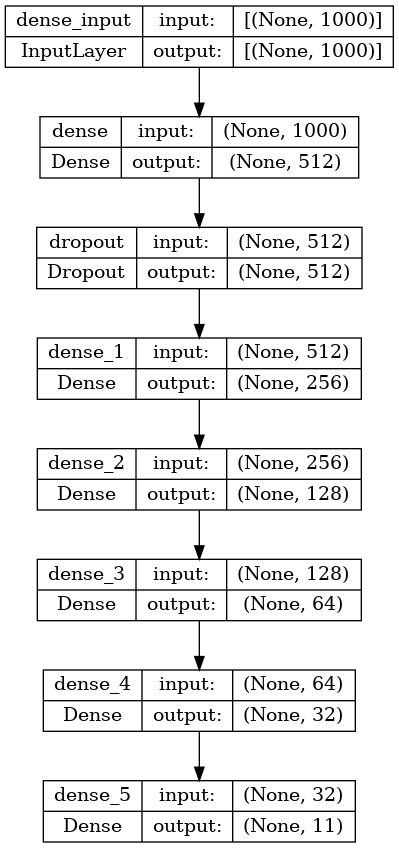

In [5]:
# Plot and save the model structure
model_structure_file = os.path.join(dir_output, 'model_structure.png')
plot_model(model, to_file=model_structure_file, show_shapes=True, show_layer_names=True)
print(f"Model structure saved to: {model_structure_file}")
display(Image(filename=model_structure_file))

# Plot the loss curve of the training process

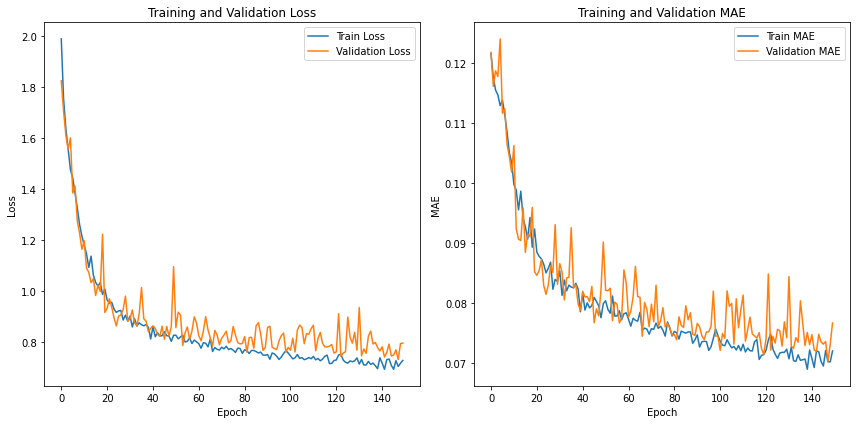

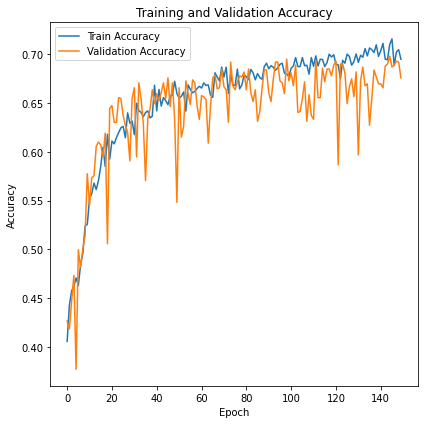

In [6]:
# Plot the fitting curve and training curve
plt.figure(figsize=(12, 6))
# Plot training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Plot training MAE and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(dir_output, 'training_validation_metrics.png'))
plt.show()
# Plot training accuracy and validation accuracy
plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(dir_output, 'training_validation_metrics_classification.png'))
plt.show()

# Predict and calculate accuracy

## Prediction and Comparison:
- The trained model is used to predict the class probabilities for the test set (`X_test`).
- `y_test_classes`: The true class labels are converted from one-hot encoding to class indices, adjusted by `min_label`.
- `y_pred_classes`: The predicted class labels are derived by selecting the class with the highest probability from the model’s output.

## Accuracy Calculation:
- The accuracy is computed using `accuracy_score` by comparing the true and predicted class labels.

## Evaluation Metrics:
- **Mean Squared Error (MSE)**: Measures the average squared differences between true and predicted class labels.
- **R² Score**: Indicates the proportion of variance explained by the model; the closer to 1, the better.

## Save Predictions:
- The predicted class labels (`y_pred_classes`) are saved into a CSV file (`predictions_classification.csv`).

## Confusion Matrix:
- A confusion matrix is created to assess the model’s performance by showing the counts of true vs. predicted labels.
- The matrix is visualized with a heatmap, saved as `confusion_matrix.png`.

## Classification Report:
- A classification report is generated, displaying precision, recall, f1-score, and support for each class.
- The report is saved as `classification_report_classification.txt`.

## Plot True vs Predicted Values:
- A plot comparing true values (`y_test_classes`) and predicted values (`y_pred_classes`) is generated.
- The plot is saved as `true_vs_predicted_classification.png`.

## Output Files:
- **Predictions**: `predictions_classification.csv`
- **Confusion Matrix**: `confusion_matrix.png`
- **Classification Report**: `classification_report_classification.txt`
- **True vs Predicted Plot**: `true_vs_predicted_classification.png`


16/16 [==============================] - 0s 2ms/step


Test accuracy: 0.662626
Test MSE: 0.442424
Test R² Score: 0.945978


Test accuracy: 0.662626
Test MSE: 0.442424
Test R² Score: 0.945978


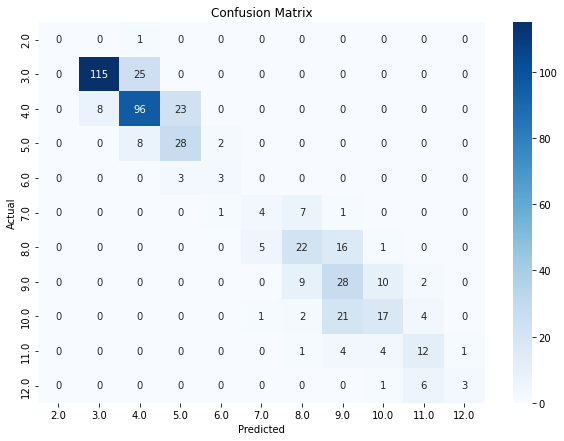

/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.93      0.82      0.87       140
         4.0       0.74      0.76      0.75       127
         5.0       0.52      0.74      0.61        38
         6.0       0.50      0.50      0.50         6
         7.0       0.40      0.31      0.35        13
         8.0       0.54      0.50      0.52        44
         9.0       0.40      0.57      0.47        49
        10.0       0.52      0.38      0.44        45
        11.0       0.50      0.55      0.52        22
        12.0       0.75      0.30      0.43        10

    accuracy                           0.66       495
   macro avg       0.53      0.49      0.50       495
weighted avg       0.68      0.66      0.67       495



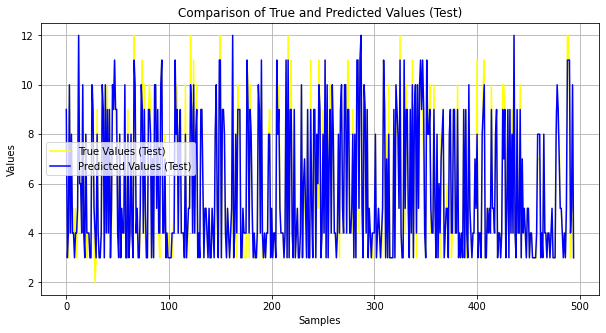

In [7]:
# Predict test set
y_pred_proba = model.predict(X_test)
y_test_classes = np.argmax(y_test, axis=1) + min_label
y_pred_classes = np.argmax(y_pred_proba, axis=1)+min_label
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test accuracy: {test_accuracy:.6f}")
logging.info(f"Test accuracy: {test_accuracy:.6f}")
mse = mean_squared_error(y_test_classes, y_pred_classes)
r2 = r2_score(y_test_classes, y_pred_classes)
print(f"Test MSE: {mse:.6f}")
print(f"Test R² Score: {r2:.6f}")
logging.info(f"Test MSE: {mse:.6f}")
logging.info(f"Test R² Score: {r2:.6f}")
# Save the prediction results
np.savetxt(os.path.join(dir_output, 'predictions_classification.csv'), y_pred_classes, delimiter=',', fmt='%d')
# Save the actual prediction comparison
#comparison = np.stack(y_test, y_pred_classes)
#np.savetxt(os.path.join(dir_output, 'true_vs_predicted_classification.csv'), comparison, delimiter=',', fmt='%d', header='True,Predicted')
# Save the actual prediction comparison
comparison = np.stack((y_test_classes, y_pred_classes), axis=-1)
np.savetxt(os.path.join(dir_output, 'true_vs_predicted_classification.csv'), comparison, delimiter=',', fmt='%d', header='True,Predicted')
# Plot the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
labels = np.arange(min_label, min_label + cm.shape[0])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(dir_output, 'confusion_matrix.png'))
plt.show()
# Print classification report
report = classification_report(y_test_classes, y_pred_classes)
print(report)
# Save classification report
report_path = os.path.join(dir_output, 'classification_report_classification.txt')
with open(report_path, 'w') as f:
    f.write(report)
# Draw a comparison chart of the predicted results and the actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test_classes,label='True Values (Test)', color='yellow', linewidth=1.5)
plt.plot(y_pred_classes, label='Predicted Values (Test)', color='blue', linewidth=1.5)
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Comparison of True and Predicted Values (Test)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(dir_output, 'true_vs_predicted_classification.png'))
plt.show()


